# Smart Classroom Data Evaluation

## Setup

In [3]:
import psycopg2
import configparser
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [4]:
config = configparser.ConfigParser()
config.read('config.ini')

db_hostname = config['DATABASE']['HOSTNAME']
db_database = config['DATABASE']['DATABASE']
db_username = config['DATABASE']['USERNAME']
db_password = config['DATABASE']['PASSWORD']

### Test connection

In [3]:
conn = psycopg2.connect(
    host=db_hostname,
    database=db_database,
    user=db_username,
    password=db_password)


cur = conn.cursor()
        
print('PostgreSQL database version:')
cur.execute('SELECT version()')
print(cur.fetchone())

cur.close()
conn.close()

PostgreSQL database version:
('PostgreSQL 14.2 on x86_64-pc-linux-musl, compiled by gcc (Alpine 10.3.1_git20211027) 10.3.1 20211027, 64-bit',)


### Setup connection

In [4]:
conn = psycopg2.connect(
    host=db_hostname,
    database=db_database,
    user=db_username,
    password=db_password)

cur = conn.cursor()

## Evaluation

### Forschungsfragen

Wie ist der Zusammenhang zwischen Luftqualität und Frequenz bzw. Dauer des Lüftens?

--- Markdown ---

In [5]:
startDate = "2022-05-03T06:00:00Z"
endDate = "2022-05-03T07:30:00Z"

cur.execute(f"""SELECT  time, 
                        co2, 
                        temperature, 
                        humidity, 
                        light, 
                        motion 
                FROM api_measurement 
                WHERE time BETWEEN '{startDate}' AND '{endDate}' 
                AND fk_measurement_station_id = 1; """)
data = cur.fetchall()
data = pd.DataFrame(data)
data.columns = ["Time", "CO2", "Temperature", "Humidity", "Light", "Motion"]

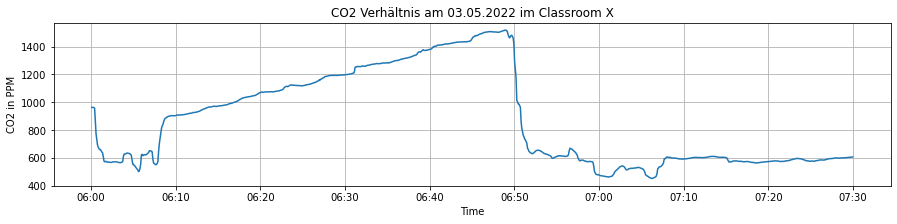

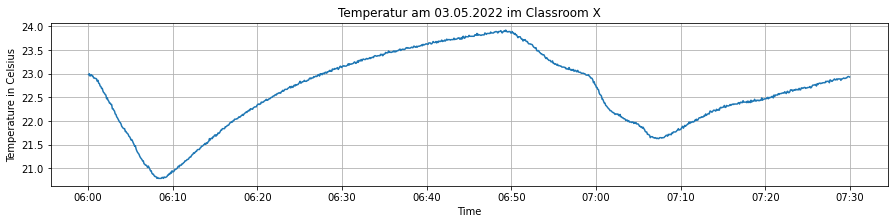

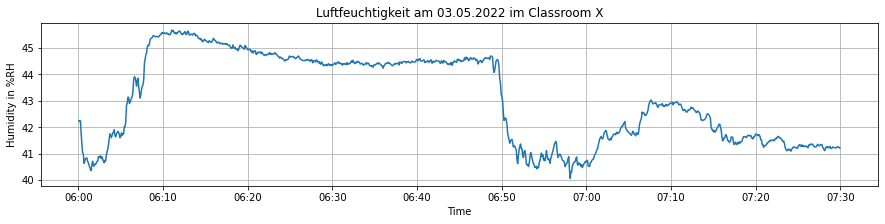

In [6]:
plt.figure(figsize = (15,3))
plt.plot(data["Time"], data["CO2"])
plt.xlabel("Time")
plt.ylabel("CO2 in PPM")
plt.title("CO2 Verhältnis am 03.05.2022 im Classroom X")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

plt.figure(figsize = (15,3))
plt.plot(data["Time"], data["Temperature"])
plt.xlabel("Time")
plt.ylabel("Temperature in Celsius")
plt.title("Temperatur am 03.05.2022 im Classroom X")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

plt.figure(figsize = (15,3))
plt.plot(data["Time"], data["Humidity"])
plt.xlabel("Time")
plt.ylabel("Humidity in %RH")
plt.title("Luftfeuchtigkeit am 03.05.2022 im Classroom X")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

Lässt sich anhand der Luftqualität etwas über die Anzahl Personen im Raum aussagen?

--- Markdown ---
Studenplan:
<p> 
<img src='Stundenplan 5a.png' width=500px height=auto>

In [73]:
#get all Classrooms from database and filter them

import psycopg2, pandas


def get_measurement_from_classroom(name):
    startDate = "2022-05-03 08:00:00"
    endDate = "2022-05-03 09:30:00"

    con = psycopg2.connect(
        host=db_hostname,
        database=db_database,
        user=db_username,
        password=db_password)


    sql_stations = """
            select * from api_classroom
            inner join api_measurementstation on api_classroom.id = api_measurementstation.fk_classroom_id
            inner join api_measurement on api_measurementstation.id = api_measurement.fk_measurement_station_id
            where api_classroom.name = '{}' and time BETWEEN '{}' AND '{}';
    """.format(name, startDate, endDate)
        
    result = pandas.read_sql_query(sql_stations,con)
        
    return result
    

In [74]:
Measurments = get_measurement_from_classroom("Primarklasse_EG")
print(Measurments.head())

   id             name               description room_number  \
0   2  Primarklasse_EG  Primarklasse Erdgeschoss         YVO   
1   2  Primarklasse_EG  Primarklasse Erdgeschoss         YVO   
2   2  Primarklasse_EG  Primarklasse Erdgeschoss         YVO   
3   2  Primarklasse_EG  Primarklasse Erdgeschoss         YVO   
4   2  Primarklasse_EG  Primarklasse Erdgeschoss         YVO   

                        updated_on  id  active               name  \
0 2022-05-04 17:33:13.515229+00:00   2   False  Station_Primar_EG   
1 2022-05-04 17:33:13.515229+00:00   2   False  Station_Primar_EG   
2 2022-05-04 17:33:13.515229+00:00   2   False  Station_Primar_EG   
3 2022-05-04 17:33:13.515229+00:00   2   False  Station_Primar_EG   
4 2022-05-04 17:33:13.515229+00:00   2   False  Station_Primar_EG   

   fk_classroom_id       id                             time    co2  \
0                2  1014390 2022-05-03 09:29:59.213408+00:00  724.0   
1                2  1014387 2022-05-03 09:29:54.007814+00:

--- Markdown ---
Studenplan:
<p> 
<img src='Studenplan 4a Oben.png' width=500px height=auto>

In [76]:
Measurments = get_measurement_from_classroom("Primarklasse_OG1")
print(Measurments.head())

   id              name                   description room_number  \
0   1  Primarklasse_OG1  Primarklasse 1. Obergeschoss        DEMO   
1   1  Primarklasse_OG1  Primarklasse 1. Obergeschoss        DEMO   
2   1  Primarklasse_OG1  Primarklasse 1. Obergeschoss        DEMO   
3   1  Primarklasse_OG1  Primarklasse 1. Obergeschoss        DEMO   
4   1  Primarklasse_OG1  Primarklasse 1. Obergeschoss        DEMO   

                        updated_on  id  active                name  \
0 2022-05-04 18:04:27.282132+00:00   1    True  Station_Primar_OG1   
1 2022-05-04 18:04:27.282132+00:00   1    True  Station_Primar_OG1   
2 2022-05-04 18:04:27.282132+00:00   1    True  Station_Primar_OG1   
3 2022-05-04 18:04:27.282132+00:00   1    True  Station_Primar_OG1   
4 2022-05-04 18:04:27.282132+00:00   1    True  Station_Primar_OG1   

   fk_classroom_id       id                             time    co2  \
0                1  1014388 2022-05-03 09:29:55.665206+00:00  500.0   
1                1  10

--- Markdown ---
Studenplan:
<p> 
<img src='Oberstufe.png' width=500px height=auto>

In [66]:
Measurments = get_measurement_from_classroom("oberstufe")
print(Measurments.head())

Empty DataFrame
Columns: [id, time, co2, temperature, humidity, insert_time, fk_measurement_station_id, light, motion, id, active, name, fk_classroom_id, id, name, description, room_number, updated_on]
Index: []


Lässt sich aus den Messdaten der optimale Zeitpunkt zum Lüften (laufend) ermitteln?

--- Markdown ---

Welche weiteren Erkenntnisse lassen sich aus den erfassten Messdaten ableiten?

--- Markdown ---

Welche Erkenntnisse von Dritten können Sie allenfalls bestätigen/widerlegen?

--- Markdown ---

# Close Connection

In [7]:
cur.close()
conn.close()